<a href="https://colab.research.google.com/github/AdikaMalviya/Gcolab/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Aug 16 18:36:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [5]:
# Multiplication of two NxN matrices
def loop_mm(A,B,n):
    res = [([0]*n) for i in range(n)]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                res[i][j]+=A[i][k]*B[k][j]
    return res

In [6]:
# Matrix Multiplication using numpy
def numpy_mm(A,B,n):
    res=[([0]*n) for i in range(n)]
    res=np.dot(A,B)
    return res

In [7]:
simple_multiplication_time=[]
numpy_multiplication_time=[]
simple_GFLOPS=[]
numpy_GFLOPS=[]
sizes=[]
to_giga=2**30

In [11]:
for size in range(1,500,10):
    n=size
    A=np.random.randint(10,size=(n,n))
    B=np.random.randint(10,size=(n,n))
    start=timeit.default_timer()
    loop_matrix_multiply = loop_mm(A,B,n)
    end = timeit.default_timer()
    simple_multiplication_time += [end-start]
    simple_GFLOPS+=[2*(size**3)/(end-start)/to_giga]
    start=timeit.default_timer()
    numpy_matrix_multiply = numpy_mm(A,B,n)
    end = timeit.default_timer()
    numpy_multiplication_time += [end-start]
    numpy_GFLOPS+=[2*(size**3)/(end-start)/to_giga]
    sizes+=[size]

KeyboardInterrupt: ignored

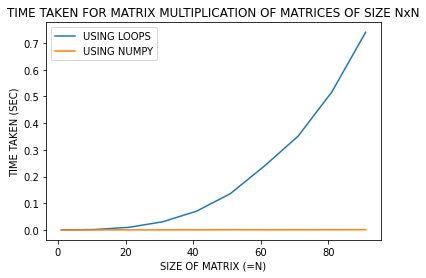

In [9]:
plt.plot(sizes,simple_multiplication_time,label="USING LOOPS")
plt.plot(sizes,numpy_multiplication_time,label="USING NUMPY")
plt.xlabel("SIZE OF MATRIX (=N)")
plt.ylabel("TIME TAKEN (SEC)")
plt.title("TIME TAKEN FOR MATRIX MULTIPLICATION OF MATRICES OF SIZE NxN")
plt.legend()

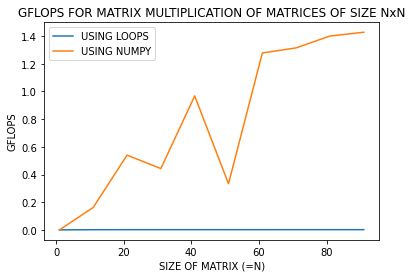

In [10]:
plt.plot(sizes,simple_GFLOPS,label="USING LOOPS")
plt.plot(sizes,numpy_GFLOPS,label="USING NUMPY")
plt.xlabel("SIZE OF MATRIX (=N)")
plt.ylabel("GFLOPS")
plt.title("GFLOPS FOR MATRIX MULTIPLICATION OF MATRICES OF SIZE NxN")
plt.legend()